# Introduction to neural network classification with Tensorflow

In this notebook we're going to learn how to write neural networks for classification problems.
A classification is where you try to classify something as one thing or another

A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now..Let's visualize it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "Label":y})
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


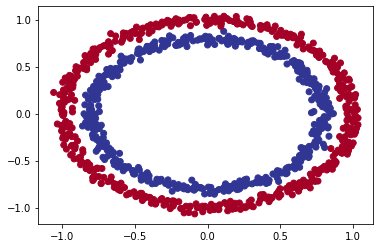

In [ ]:
# Visualise with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output Shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we'r working
len(X), len(y)

(1000, 1000)

In [ ]:
# View first example of features and labels
X[14],y[14]

(array([ 0.60077633, -0.58742632]), 1)

## Steps in modelling

The steos in modelling with Tensorflow are typically:
1.Create or import the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.6582 - accuracy: 0.4690
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.8473 - accuracy: 0.4910
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 6.9113 - accuracy: 0.4550
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 7.1319 - accuracy: 0.4720
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 7.1586 - accuracy: 0.4860


In [ ]:
# Improving model by trying to train for longer
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 1s 4ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

Since we're working on a binary classification problem and we are getting around 50% accuracy, we will add a layer

In [ ]:
tf.random.set_seed(42)

# 1. Create a model, with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X,y, epochs=200, verbose=0)

# Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

# Improve our model

- Adding layers
- Increasing the number of hidden units
- Change the activation functions
- Change the optimization function
- CHange the learning rate
- Fitting on more data
- Fitting for longer

![Image](https://github.com/Sakalya100/Memories/blob/main/WhatsApp%20Image%202023-03-08%20at%2005.03.13.jpg)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X,y, epochs=100, verbose=0)

In [ ]:
# Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.5030


[0.7023387551307678, 0.503000020980835]

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


To visualise our model's prediction let's create a function `plot_decision_boundary()`. This function will:

* Take in a trained model, features(X) and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np
def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")

    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:,0],X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Doing binary classification


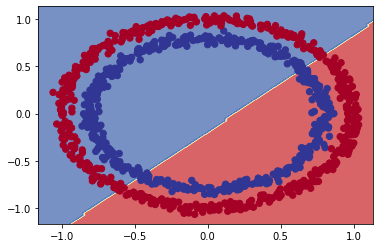

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
x_min, x_max,y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

## The missing piece: Non-Linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X,y, epochs=1000)

Epoch 1/1000
32/32 [==============================] - 2s 5ms/step - loss: 4.3236 - accuracy: 0.4630
Epoch 2/1000
32/32 [==============================] - 0s 4ms/step - loss: 4.2507 - accuracy: 0.4610
Epoch 3/1000
32/32 [==============================] - 0s 4ms/step - loss: 4.2257 - accuracy: 0.4620
Epoch 4/1000
32/32 [==============================] - 0s 4ms/step - loss: 4.2126 - accuracy: 0.4610
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 4.2113 - accuracy: 0.4610
Epoch 6/1000
32/32 [==============================] - 0s 4ms/step - loss: 4.1914 - accuracy: 0.4640
Epoch 7/1000
32/32 [==============================] - 0s 4ms/step - loss: 4.1753 - accuracy: 0.4680
Epoch 8/1000
32/32 [==============================] - 0s 4ms/step - loss: 4.1579 - accuracy: 0.4670
Epoch 9/1000
32/32 [==============================] - 0s 3ms/step - loss: 4.1568 - accuracy: 0.4670
Epoch 10/1000
32/32 [==============================] - 0s 3ms/step - loss: 4.1556 - accuracy: 0.4670

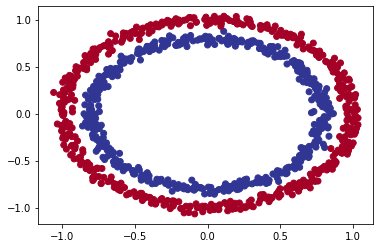

In [ ]:
# Check out data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 4ms/step
Doing binary classification


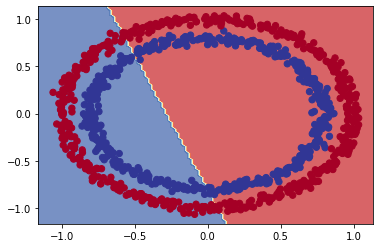

In [ ]:
# Check the decision boundary for the latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Building a neural network using a non-linear activation function

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

# COmpile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 4.4228 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3995 - accuracy: 0.4720
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3552 - accuracy: 0.4720
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3337 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3151 - accuracy: 0.4740
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2863 - accuracy: 0.4700
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2584 - accuracy: 0.4680
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2538 - accuracy: 0.4680
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2503 - accuracy: 0.4680
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2469 - accuracy: 0.4670
Epoch 11/

In [ ]:
# Set the seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X,y, epochs=250)

32/32 [==============================] - 0s 4ms/step - loss: 0.3122 - accuracy: 0.8500
Epoch 25/250
32/32 [==============================] - 0s 4ms/step - loss: 0.2995 - accuracy: 0.8550
Epoch 26/250
32/32 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.8590
Epoch 27/250
32/32 [==============================] - 0s 3ms/step - loss: 0.2802 - accuracy: 0.8620
Epoch 28/250
32/32 [==============================] - 0s 3ms/step - loss: 0.2781 - accuracy: 0.8570
Epoch 29/250
32/32 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.8570
Epoch 30/250
32/32 [==============================] - 0s 3ms/step - loss: 0.5736 - accuracy: 0.8310
Epoch 31/250
32/32 [==============================] - 0s 3ms/step - loss: 2.1488 - accuracy: 0.6840
Epoch 32/250
32/32 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7630
Epoch 33/250
32/32 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.8210
Epoch 34/250


KeyboardInterrupt: ignored

In [ ]:
# Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 3ms/step
Doing binary classification


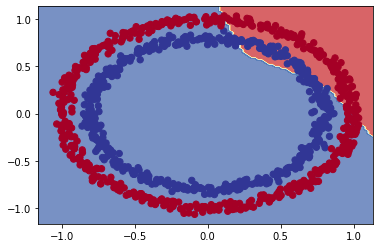

In [ ]:
# How does our predictions look like
plot_decision_boundary(model_6, X,y)

In [ ]:
# Set the seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X,y, epochs=250)

Epoch 1/250
32/32 [==============================] - 2s 3ms/step - loss: 0.6908 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6901 - accuracy: 0.5090
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5080
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5090
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5070
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.5080
Epoch 7/250
32/32 [==============================] - 0s 6ms/step - loss: 0.6873 - accuracy: 0.5130
Epoch 8/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.5160
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.5190
Epoch 10/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6858 - accuracy: 0.5160
Epoch 11/

In [ ]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1946 - accuracy: 0.9870


[0.19460362195968628, 0.9869999885559082]

313/313 [==============================] - 2s 4ms/step
Doing binary classification


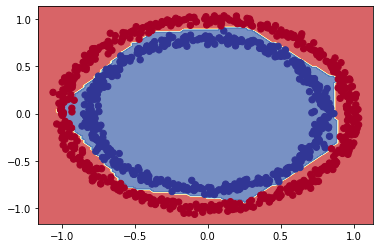

In [ ]:
# Let's visualise
plot_decision_boundary(model_7,X,y)

🤔**Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly? Hint: WHat data did the model learn on and what data did we predict on?

🔑**Note:** The combination of **linear(straight lines) and non-linear(Non-straight lines) functions** is one of the key fundamentals of neural networks.

In [ ]:
A = tf.cast(tf.range(-10,10), tf.float32)

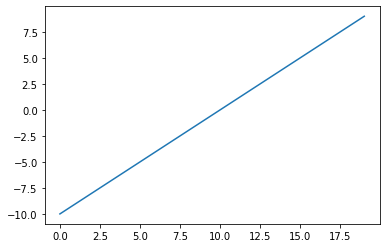

In [ ]:
plt.plot(A)

In [ ]:
# Let's try by replicating sigmoid
def sigmoid(x):
  return 1/(1 + tf.exp(-x))

In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

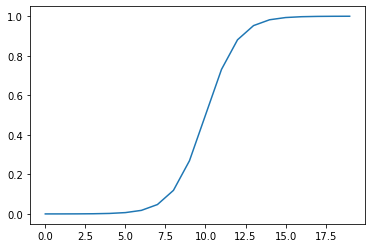

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
# Replicating ReLu activation function
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

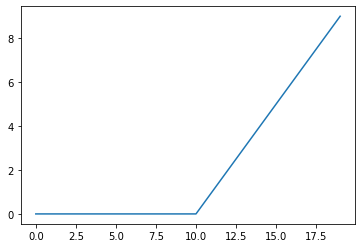

In [ ]:
plt.plot(relu(A))

In [ ]:
# Replicating linear activation function
def linear(x):
  return x

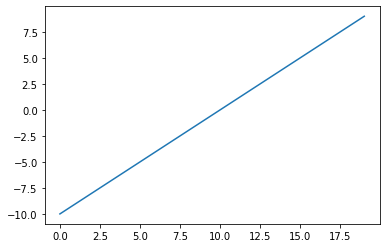

In [ ]:
plt.plot(tf.keras.activations.linear(A))

## Evaluating and improving our classification

In [ ]:
# Split into train and test sets
X_train,y_train = X[:800], y[:800]
X_test,y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
# Let's recreate a model
tf.random.set_seed(42)

# 1. Create a model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train,y_train, epochs=250)

Epoch 1/250
25/25 [==============================] - 3s 4ms/step - loss: 0.7556 - accuracy: 0.5025
Epoch 2/250
25/25 [==============================] - 0s 4ms/step - loss: 0.7421 - accuracy: 0.4938
Epoch 3/250
25/25 [==============================] - 0s 4ms/step - loss: 0.7329 - accuracy: 0.4875
Epoch 4/250
25/25 [==============================] - 0s 4ms/step - loss: 0.7259 - accuracy: 0.4812
Epoch 5/250
25/25 [==============================] - 0s 4ms/step - loss: 0.7209 - accuracy: 0.4900
Epoch 6/250
25/25 [==============================] - 0s 4ms/step - loss: 0.7150 - accuracy: 0.4800
Epoch 7/250
25/25 [==============================] - 0s 4ms/step - loss: 0.7097 - accuracy: 0.4812
Epoch 8/250
25/25 [==============================] - 0s 4ms/step - loss: 0.7062 - accuracy: 0.4825
Epoch 9/250
25/25 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.4837
Epoch 10/250
25/25 [==============================] - 0s 6ms/step - loss: 0.7016 - accuracy: 0.4712
Epoch 11/

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9850


[0.05059110000729561, 0.9850000143051147]

## Plot the loss(training) curves

In [ ]:
# Convert history objct to dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.755606,0.50250
1,0.742074,0.49375
2,0.732899,0.48750
3,0.725889,0.48125
4,0.720923,0.49000
...,...,...
245,0.051089,1.00000
246,0.050580,1.00000
247,0.050274,1.00000
248,0.049455,1.00000


Text(0.5, 1.0, 'Model_8 loss curves')

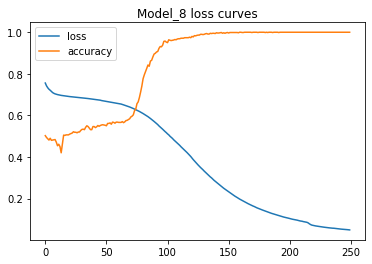

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')


## Find the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* its training.
* Another model
* A modified loss curve plot.

In [ ]:
# Let's recreate a model
tf.random.set_seed(42)

# 1. Create a model (same as model_7)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer= "Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model (pass lr_scheduler callback)
history_9 = model_9.fit(X_train,y_train, epochs=100,
                      callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 5ms/step - loss: 0.6927 - accuracy: 0.5188 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.5063 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5125 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6924 - accuracy: 0.5050 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5088 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss:

<AxesSubplot:xlabel='epochs'>

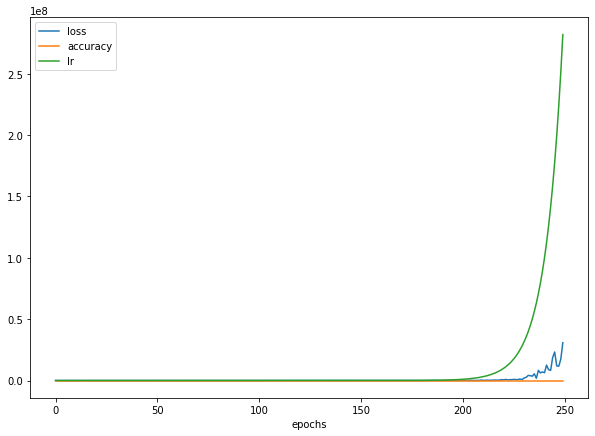

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel='epochs')

Text(0.5, 1.0, 'Learning vs Loss')

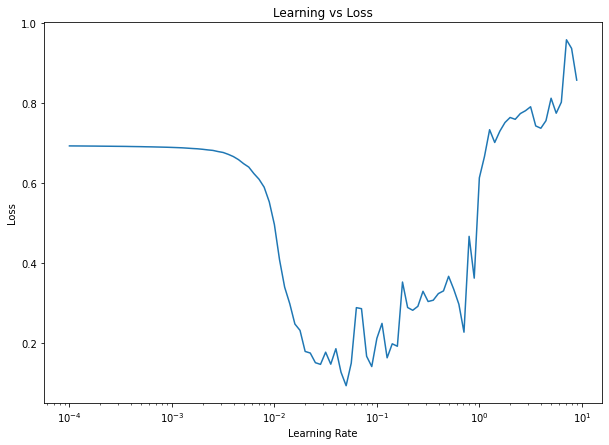

In [ ]:
# Plot the learning rate vs the loss
lrs = 1e-4 * 10**(tf.range(100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning vs Loss")

In [ ]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's recreate a model
tf.random.set_seed(42)

# 1. Create a model (same as model_7)
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_10.compile(loss='binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

# 3. Fit the model
history_10 = model_10.fit(X_train,y_train, epochs=250)

Epoch 1/250
25/25 [==============================] - 1s 5ms/step - loss: 0.6937 - accuracy: 0.5075
Epoch 2/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5075
Epoch 3/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.4650
Epoch 4/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.4712
Epoch 5/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5050
Epoch 6/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.4650
Epoch 7/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4725
Epoch 8/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4812
Epoch 9/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4950
Epoch 10/250
25/25 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4913
Epoch 11/

In [ ]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.3088 - accuracy: 0.9900


[0.30882811546325684, 0.9900000095367432]

313/313 [==============================] - 2s 5ms/step
Doing binary classification
313/313 [==============================] - 2s 5ms/step
Doing binary classification


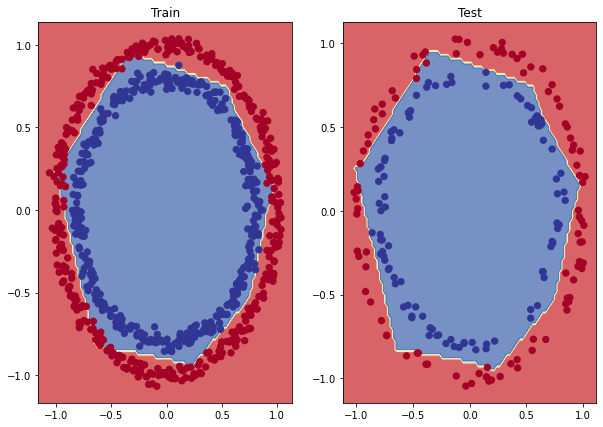

In [ ]:
# Plot the decision boundary for the training and test sets
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test, y=y_test)

## More classification evaluation methods

* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification Report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")


7/7 [==============================] - 0s 4ms/step - loss: 0.3088 - accuracy: 0.9900
Model loss on the test set: 0.30882811546325684
Model accuracy on the test set: 99.00%


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# Make oredictions
y_preds = model_10.predict(X_test)

# COnfusion matrix
confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 3ms/step


ValueError: ignored

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[0.81395155],
       [0.9525914 ],
       [0.855445  ],
       [0.6194364 ],
       [0.24764518],
       [0.4814935 ],
       [0.5777955 ],
       [0.46874872],
       [0.9679857 ],
       [0.06248829]], dtype=float32)

In [ ]:
# Convert the prediction probabilites to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

## Prettifying confusion matrix

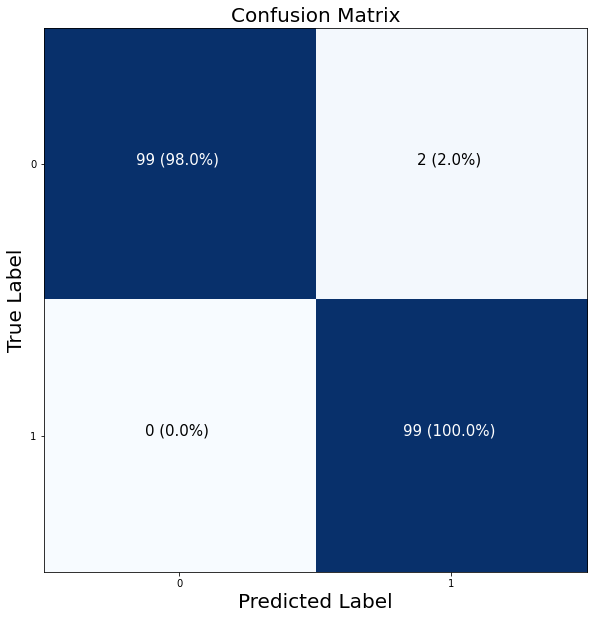

In [ ]:
import itertools

figsize = (10,10)

# Create the confusion matrix
cm  = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] # Normaloze our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)

# Create classes
classes= False

if classes:
  labels=classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)
# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set the threshold for different colors
threshold = (cm.max() + cm.min())/2

# Plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%) ",
           horizontalalignment = "center",
           color="white" if cm[i,j]>threshold else "black",
           size=15)